# Header

In [2]:
# import modules

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

1. Write a function to create a list of results for rolling a die with a given number of sides

In [3]:
def dice_values(a=6):
    """
    Return a list of all results for rolling a die with a given number of sides
    
    Parameters
    ----------
    a: int
        Number of sides of the die; integer greater than zero
        Default = 6
    
    Returns
    -------
    result_list: list
        List of all possible results for rolling the die
    """
    result_list = []
    for x in range(a):
        result_list.append(x+1)
    return result_list

In [4]:
dice_values()

[1, 2, 3, 4, 5, 6]

2. Write a function to create a list of results for rolling a fair die with a given number of sides a given number of times, including duplicate values

In [5]:
def dice_list(a=1,b=6):
    """
    Return a list of results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    
    Parameters
    ----------
    a: int
        Number of times to roll the die; integer greater than zero
        Default = 1
        
    b: int
        Number of sides of the die; integer greater than zero
        Default = 6
    
    Returns
    -------
    compound_list: list
        List of results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    """
    print('Starting compilation...')
    compound_list = []
    final_list = []
    for _ in range(a):
        compound_list.append(dice_values(b))
    roll_tuples_list = list(itertools.product(*compound_list))
    for x in range(len(roll_tuples_list)):
        roll_sum = sum(list(roll_tuples_list[x]))
        final_list.append(roll_sum)
    final_list.sort()
    print('Compilation complete.')
    return final_list


Starting compilation...
Compilation complete.


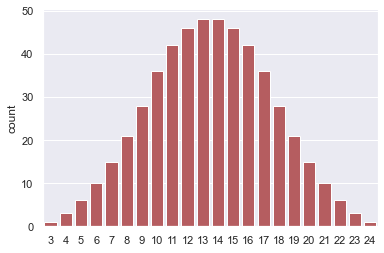

In [5]:
roll = dice_list(3,8)

sns.countplot(x=roll, color='r')
plt.show()

# roll = dice_list([(3,8), (1,4), ... ])

# dice 1 = 8
# dice 1 number = 3

# dice 2 = 4
# dice 2 number = 1

#.
#.
#.

#

3. this is slow for large number of dice. Write an alternative function to 2

In [6]:
def dice_list2(a=1,b=6):
    """Return a list of results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    
    Parameters
    ----------
    a: int
        Number of times to roll the die; integer greater than zero
        Default = 1
        
    b: int
        Number of sides of the die; integer greater than zero
        Default = 6
    
    Returns
    -------
    compound_list: list
        List of results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    """
    print('Starting compilation...')
    one_roll = dice_values(b)
    tuples_list = itertools.product(one_roll, repeat=a)
    final_list = list(map(lambda x: sum(x), tuples_list))
    final_list.sort()
    print('Compilation complete.')
    return final_list
    

Starting compilation...
Compilation complete.


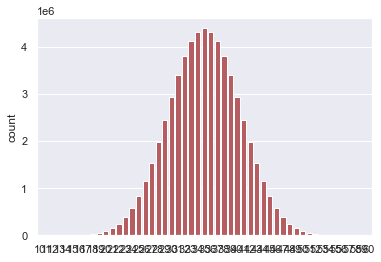

In [8]:
roll = dice_list2(10,6)

sns.countplot(x=roll, color='r')
plt.show()

4. This is nicer code but still slow for large numbers of dice. Maybe the list object is too large? Try generating instead a 2D summary array of results and their counts by iterating over the map object instead of holding the full list in memory

In [10]:
def dice_list3(a=1,b=6):
    """Return a list of results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    
    Parameters
    ----------
    a: int
        Number of times to roll the die; integer greater than zero
        Default = 1
        
    b: int
        Number of sides of the die; integer greater than zero
        Default = 6
    
    Returns
    -------
    final_dict: dictionary
        Results for rolling a fair die with a given number of sides a given number of times, incluiding duplicate values
    """
    print('Starting compilation...')
    one_roll = dice_values(b)
    tuples_list = itertools.product(one_roll, repeat=a)
    result_map = map(lambda x: sum(x), tuples_list)
    
    #code is quick up to here ^
      
    #testing speed of unpacking map into int instead of list
    #this is no faster than unpacking map into list
    #values_sum = 0
    #values_len = 0
    #for y in result_map:
    #    values_sum = values_sum + y
    #    values_len += 1
    #values_mean = values_sum / values_len
    
    #below: code for turning mapping into dictionary of value:count
    
    results_list = []
    for x in range(a, b * a + 1):
        results_list.append(x)
    
    #code for identifying halfway point of values list, rounded up
    #min_value = a
    #max_value = a * b
    #half_round_up = -(-len(results_list) // 2)  
    
    counts_list = list(np.zeros((b * a) - a + 1, dtype='int'))
           
    for y in result_map:
        counts_list[y-a] += 1
    
    final_dict = dict(zip(results_list, counts_list))
        
    print('Compilation complete.')
    return final_dict

Starting compilation...
Compilation complete.
[]


In [11]:
dice_list3(10,6)

#idea: calculate only first half, then flip to generate second half!
# https://stackoverflow.com/questions/2356501/how-do-you-round-up-a-number-in-python

Starting compilation...
Compilation complete.


{10: 1,
 11: 10,
 12: 55,
 13: 220,
 14: 715,
 15: 2002,
 16: 4995,
 17: 11340,
 18: 23760,
 19: 46420,
 20: 85228,
 21: 147940,
 22: 243925,
 23: 383470,
 24: 576565,
 25: 831204,
 26: 1151370,
 27: 1535040,
 28: 1972630,
 29: 2446300,
 30: 2930455,
 31: 3393610,
 32: 3801535,
 33: 4121260,
 34: 4325310,
 35: 4395456,
 36: 4325310,
 37: 4121260,
 38: 3801535,
 39: 3393610,
 40: 2930455,
 41: 2446300,
 42: 1972630,
 43: 1535040,
 44: 1151370,
 45: 831204,
 46: 576565,
 47: 383470,
 48: 243925,
 49: 147940,
 50: 85228,
 51: 46420,
 52: 23760,
 53: 11340,
 54: 4995,
 55: 2002,
 56: 715,
 57: 220,
 58: 55,
 59: 10,
 60: 1}

Starting compilation...
Compilation complete.


ZeroDivisionError: division by zero